In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [393]:
numerical = pd.read_csv('numerical.csv')

In [394]:
numerical

,Unnamed: 0.1,Unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
1,3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
2,10,10,5154.764074,82730,127,13.0,31,0.0,1,442.521087,1
3,13,13,5454.587929,66334,69,25.0,25,0.0,4,331.200000,1
4,16,16,5326.677654,76717,66,26.0,10,0.0,6,300.528579,2
...,...,...,...,...,...,...,...,...,...,...,...
4538,10902,10902,3579.023825,28304,91,10.0,30,2.0,1,655.200000,1
4539,10903,10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
4540,10904,10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
4541,10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1


In [395]:
numerical.head()

,Unnamed: 0.1,Unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
0,2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
1,3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
2,10,10,5154.764074,82730,127,13.0,31,0.0,1,442.521087,1
3,13,13,5454.587929,66334,69,25.0,25,0.0,4,331.200000,1
4,16,16,5326.677654,76717,66,26.0,10,0.0,6,300.528579,2


In [396]:
numerical.drop(['Unnamed: 0.1'],axis=1,inplace=True)

In [397]:
numerical.drop(['Unnamed: 0'],axis=1,inplace=True)

In [398]:
numerical.drop(['month'],axis=1,inplace=True)

In [401]:
numerical.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,14947.917300,22139,100,34.0,31,0.0,2,480.000000
1,22332.439460,49078,97,10.0,3,0.0,2,484.013411
2,5154.764074,82730,127,13.0,31,0.0,1,442.521087
3,5454.587929,66334,69,25.0,25,0.0,4,331.200000
4,5326.677654,76717,66,26.0,10,0.0,6,300.528579


In [402]:
# 1 - create x,y (take out the Y = total claim amount)

X = numerical.drop(['total claim amount'],axis=1)
Y = numerical['total claim amount']

In [403]:
# 2 - normalize

In [404]:
from scipy import stats 

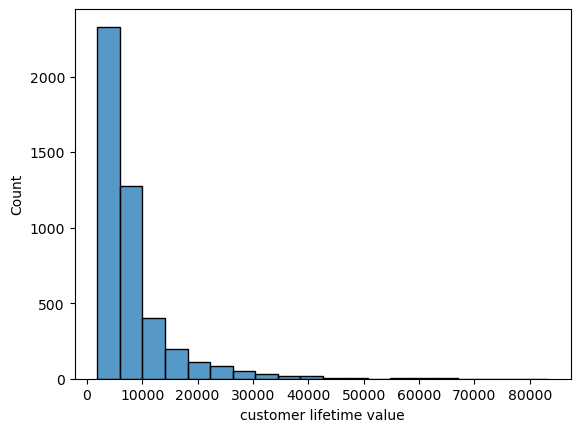

In [356]:
sns.histplot(X['customer lifetime value'],bins=20)
plt.show()

In [406]:
len(X[numerical['customer lifetime value'] <= 0])


0

In [407]:
stats.boxcox(X['customer lifetime value'])


(array([2.81351637, 2.82750353, 2.76562263, ..., 2.82251301, 2.76669803,
        2.80491582]),
 -0.3421740112166934)

In [408]:
arr, lmbda = stats.boxcox(numerical['customer lifetime value']) 


In [409]:
numerical['customer lifetime value'] = arr

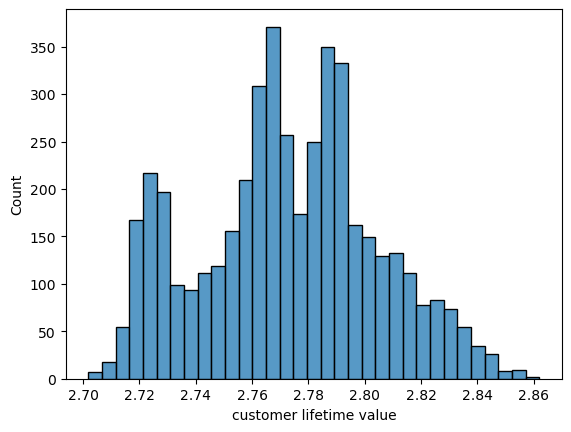

In [410]:
sns.histplot(numerical['customer lifetime value'])
plt.show()

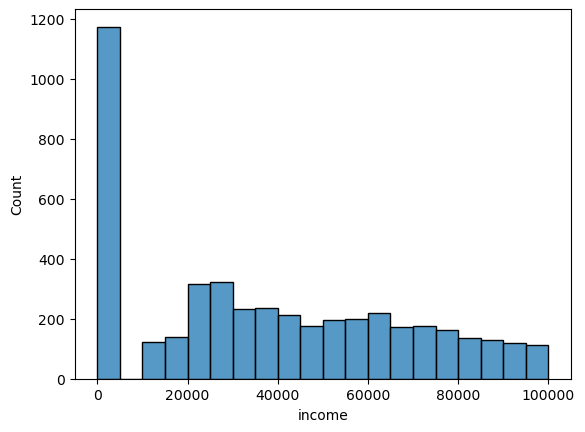

In [411]:
sns.histplot(X['income'],bins=20)
plt.show()

In [412]:
len(X[X['income'] <= 0])

1173

In [413]:
X['income'] = np.where(X['income'] < 0, 0, X['income'])

In [414]:
X['income']=X['income'].replace(0,X['income'].mean()) 

In [415]:
stats.boxcox(X['income']) 

(array([34.11937182, 41.18752354, 46.50779726, ..., 38.6538986 ,
        43.35674244, 43.85053623]),
 0.2097931006689937)

In [416]:
arr, lmbda = stats.boxcox(X['income']) 

In [417]:
numerical['income'] = arr

<AxesSubplot:xlabel='income', ylabel='Count'>

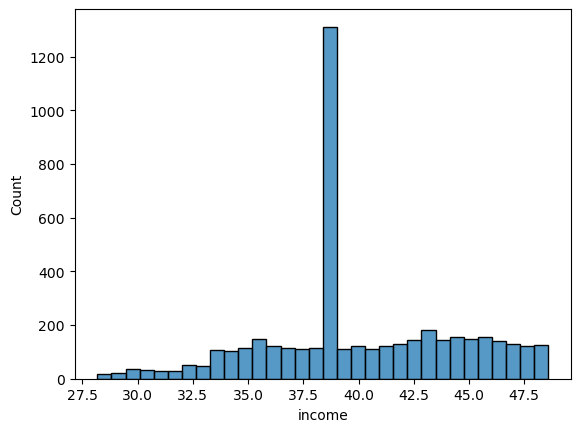

In [418]:
sns.histplot(numerical['income'])

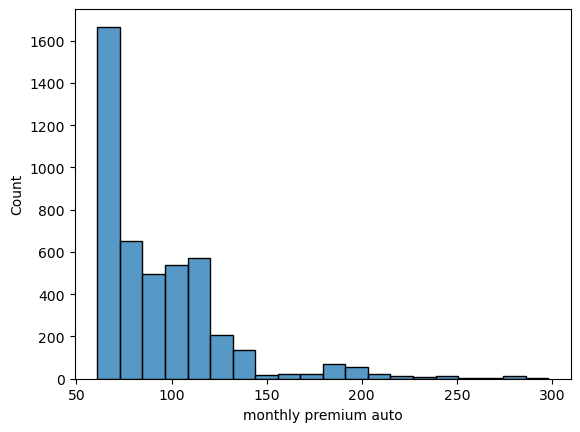

In [419]:
sns.histplot(X['monthly premium auto'],bins=20)
plt.show()

In [420]:
len(X[X['monthly premium auto'] <= 0])

0

In [421]:
stats.boxcox(X['monthly premium auto'])


(array([0.69784516, 0.69780238, 0.69812329, ..., 0.69841326, 0.69702679,
        0.69830635]),
 -1.4310137894884554)

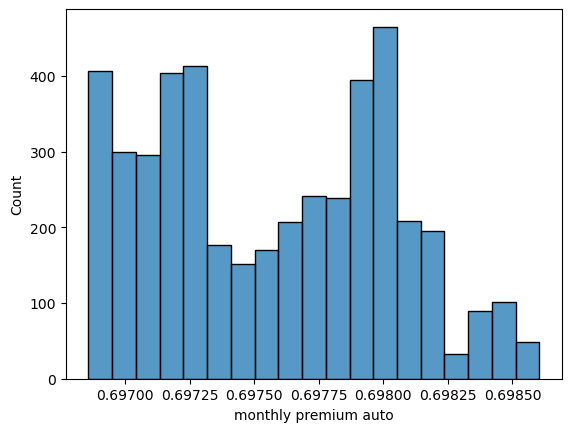

In [422]:
arr, lmbda = stats.boxcox(X['monthly premium auto']) 
X['monthly premium auto'] = arr
sns.histplot(X['monthly premium auto'])
plt.show()

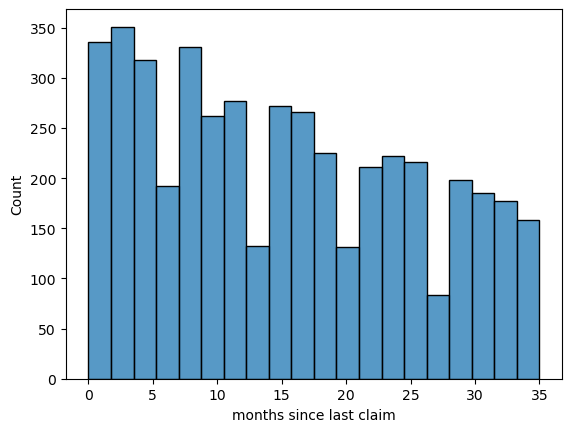

In [423]:
sns.histplot(X['months since last claim'],bins=20)
plt.show()

In [424]:
X['months since last claim'].fillna(0)

0       34.0
1       10.0
2       13.0
3       25.0
4       26.0
        ... 
4538    10.0
4539    30.0
4540    14.0
4541     7.0
4542     0.0
Name: months since last claim, Length: 4543, dtype: float64

In [425]:
len(X[X['months since last claim'] <= 0]) 

146

In [426]:
X['months since last claim'] = np.where(X['months since last claim'] < 0, 0, X['months since last claim'])
X['months since last claim']=X['months since last claim'].replace(0,X['months since last claim'].mean()) 

In [427]:
stats.boxcox(X['months since last claim'])

(array([10.98074479,  4.67235306,  5.68875169, ...,  6.00374425,
         3.5082081 ,  6.34244855]),
 0.5560927306844055)

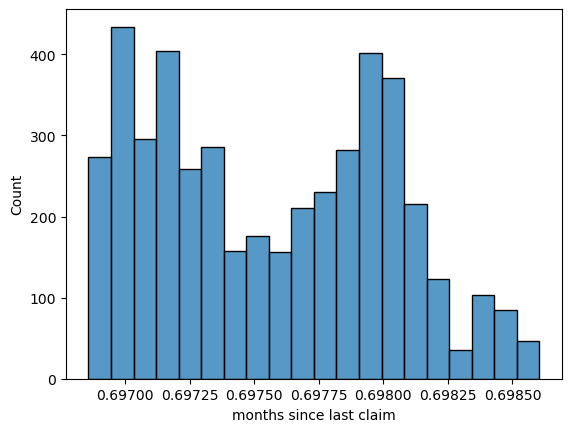

In [428]:
X['months since last claim'] = arr
sns.histplot(X['months since last claim'],bins=20)
plt.show()

In [429]:
len(X[X['months since policy inception'] <= 0])

44

In [430]:
X['months since policy inception'] = np.where(X['months since policy inception'] < 0, 0, X['months since policy inception'])
X['months since policy inception']=X['months since policy inception'].replace(0,X['months since policy inception'].mean()) 

In [431]:
stats.boxcox(X['months since policy inception'])

(array([14.45600434,  1.65615568, 14.45600434, ..., 14.81405054,
        26.1457376 , 12.98769717]),
 0.7022860398226207)

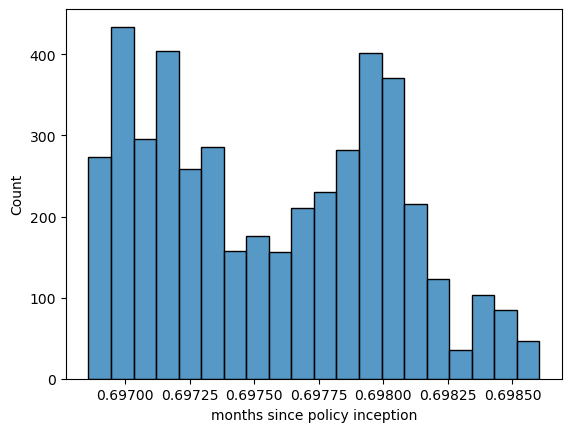

In [432]:
X['months since policy inception'] = arr
sns.histplot(X['months since policy inception'],bins=20)
plt.show()

In [433]:
from sklearn.preprocessing import LabelEncoder 

In [434]:
LabelEncoder().fit(X['number of open complaints']).transform(X['number of open complaints'])

array([0, 0, 0, ..., 0, 0, 4])

In [435]:
LabelEncoder().fit(X['number of policies']).transform(X['number of policies'])

array([1, 1, 0, ..., 1, 5, 5])

In [436]:
X['number of policies']

0       2
1       2
2       1
3       4
4       6
       ..
4538    1
4539    1
4540    2
4541    6
4542    6
Name: number of policies, Length: 4543, dtype: int64

In [437]:
X.to_csv('final_data.csv')

In [438]:
Y.to_csv('final_Y.csv')

In [439]:
X

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,14947.917300,22139.000000,0.697845,0.697845,0.697845,0.0,2
1,22332.439460,49078.000000,0.697802,0.697802,0.697802,0.0,2
2,5154.764074,82730.000000,0.698123,0.698123,0.698123,0.0,1
3,5454.587929,66334.000000,0.697172,0.697172,0.697172,0.0,4
4,5326.677654,76717.000000,0.697065,0.697065,0.697065,0.0,6
...,...,...,...,...,...,...,...
4538,3579.023825,28304.000000,0.697706,0.697706,0.697706,2.0,1
4539,2771.663013,59855.000000,0.697328,0.697328,0.697328,4.0,1
4540,19228.463620,37453.033238,0.698413,0.698413,0.698413,0.0,2
4541,5259.444853,61146.000000,0.697027,0.697027,0.697027,0.0,6


In [440]:
Y

0       480.000000
1       484.013411
2       442.521087
3       331.200000
4       300.528579
           ...    
4538    655.200000
4539    355.200000
4540    897.600000
4541    273.018929
4542    618.288849
Name: total claim amount, Length: 4543, dtype: float64